In [ ]:
#Import necessary packages

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
from __future__ import print_function
from PYME.recipes import modules
from PYME.LMVis import pipeline
from PYME.recipes import tracking,localisations,base;

#data = pipeline.Pipeline("../data/Biplane QE-PAINT_pig tissue/pig_tissue_biplane_RyR_IP3R_ExchangePAINT.hdf")
## AC comment - The .. takes you back a directory which would already be data
data = pipeline.Pipeline("../Biplane QE-PAINT_pig tissue/pig_tissue_biplane_RyR_IP3R_ExchangePAINT.hdf")

In [2]:
pipeline

<module 'PYME.LMVis.pipeline' from 'c:\users\work\documents\pyme_home\python-microscopy\PYME\LMVis\pipeline.pyc'>

In [3]:
# load our saved recipe

#data.recipe.update_from_yaml("../data/Biplane QE-PAINT_pig tissue/fiducial_driftcorrection recipe.yaml')
## AC comment - The notebook is already in this folder so you only need to specify the yaml name.
data.recipe.update_from_yaml("fiducial_driftcorrection recipe.yaml")                             



print("Current data source: %s" % data.selectedDataSourceKey) # what is the currently selected data source
print("Available data sources: %s" % ', '.join(data.dataSources.keys())) # look at all the data sources we could select

data.selectDataSource('timedSpecies')
print("Number of events in data source timespecies is %d" % data.x.size)

Current data source: filtered_localizations
Available data sources: fiducialApplied, timedSpecies, corrected_fiducials, Fiducials, FitResults, filtered_localizations, _Localizations, Localizations, fiducialAdded, colour_mapped
Number of events in data source timespecies is 465978


c:\users\work\documents\pyme_home\python-microscopy\PYME\IO\tabular.py:48: VisibleDeprecationWarning: mappingFilter is deprecated, use MappingFilter instead
  warnings.warn(VisibleDeprecationWarning('%s is deprecated, use %s instead' % (name, cls.__name__)))
c:\users\work\documents\pyme_home\pyme-extra\PYMEcs\Analysis\trackFiducials.py:152: RuntimeWarning: Mean of empty slice
  mm = np.nanmean(meas, 0)


In [4]:
tb = tracking.FindClumps(inputName='timedSpecies', outputName= 'with_clumps', timeWindow=5)
data.recipe.add_module(tb)
dm = localisations.MergeClumps(inputName='with_clumps', outputName= 'coalesced')
data.recipe.add_module(dm)
data.recipe.execute()

Current data source: coalesced


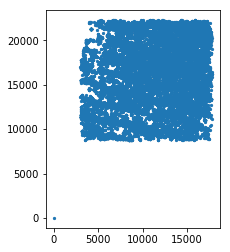

In [5]:
data.selectDataSource('coalesced')
print("Current data source: %s" % data.selectedDataSourceKey) # what is the currently selected data source
plt.subplot(aspect='equal') # we are trying to get the plot aspect ratio to be correct
plt.scatter(data.x,data.y,s=5)

## Render image as part of pipeline

We cimages as part of applying a recipe to the pipeline. The examples below exploits that.

The syntax to specify such a module directly could be tricky. So therefore it is much better to edit the rendering module in VisGUI or a similar GUI app, and then save as needed.

This is an example for a Gaussian rendering with 10 nm pixel size:

```
- localisations.DensityMapping:
    inputLocalizations: cytosolC
    jitterVariable: error_x
    outputImage: renderCytosolC
    pixelSize: 10.0
    renderingModule: Gaussian
```

In [ ]:
imdata = data.dataSources['coalesced'].data[:,:,0,0].squeeze()

In [ ]:
plt.figure()
plt.imshow(imdata,cmap='hot',vmin=0,vmax=0.30)